In [1]:
import time
import pandas as pd
import numpy as np
import geopandas as gd
from shapely.geometry import Point, box
from collections import defaultdict
from numpy import nan

import os
os.chdir(r"E:\Data challenge")

# Importing Data

In [2]:
data_drias = pd.read_csv(r"data\Drias_data\RCP_4.5.csv", sep=";", header=31)

In [3]:
data_drias

,Point,Latitude,Longitude,Contexte,Période,NORPAV,NORRR,NORRR1MM,NORPN20MM,NORPFL90,NORPXCDD,NORPINT,NORPQ90,NORPQ99,NORRR99,NORHUSAV,NORETPC,Unnamed: 17
0,139,41.3373,9.1495,RCP4.5,H1,1.88,686.66,80.00,7,80.89,48,8.29,5.21,26.28,3.96,9.18,1050.64,NaN
1,281,41.4149,9.0628,RCP4.5,H1,1.89,687.14,80.02,7,80.81,48,8.27,5.21,26.30,3.96,9.18,1049.65,NaN
2,282,41.4087,9.1577,RCP4.5,H1,1.94,709.29,81.28,7,81.06,47,8.46,5.41,27.24,3.96,9.02,1038.92,NaN
3,283,41.4025,9.2527,RCP4.5,H1,1.89,688.00,80.07,6,81.19,48,8.32,5.23,26.39,3.81,9.18,1057.07,NaN
4,422,41.4985,8.8808,RCP4.5,H1,1.94,710.59,80.50,7,80.66,49,8.48,5.42,27.73,4.19,9.16,1035.28,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26938,18942,51.0496,2.1658,RCP4.5,H3,2.01,733.41,122.48,4,62.11,22,5.80,6.23,19.91,4.79,7.73,646.74,NaN
26939,18943,51.0497,2.2796,RCP4.5,H3,2.00,734.15,122.03,4,62.48,21,5.87,6.23,20.05,5.03,7.72,646.59,NaN
26940,18944,51.0497,2.3934,RCP4.5,H3,2.01,734.45,122.06,4,62.47,21,5.87,6.23,20.06,5.03,7.72,646.47,NaN
26941,18945,51.0496,2.5071,RCP4.5,H3,2.04,745.58,122.97,4,62.48,23,5.91,6.26,20.35,5.20,7.73,643.97,NaN


In [4]:
data_Flood = pd.read_csv(r"data\Flood\flood_risk_results.csv")

In [5]:
data_Flood

,Unnamed: 0,longitude,latitude,scenario,ht
0,0,9.1495,41.3373,[],"{'high': [], 'mid': [], 'low': []}"
1,1,9.0628,41.4149,[],"{'high': [], 'mid': [], 'low': []}"
2,2,9.1577,41.4087,[],"{'high': [], 'mid': [], 'low': []}"
3,3,9.2527,41.4025,[],"{'high': [], 'mid': [], 'low': []}"
4,4,8.8808,41.4985,[],"{'high': [], 'mid': [], 'low': []}"
...,...,...,...,...,...
26938,26938,2.1658,51.0496,[],"{'high': [], 'mid': [], 'low': []}"
26939,26939,2.2796,51.0497,[],"{'high': [], 'mid': [], 'low': []}"
26940,26940,2.3934,51.0497,"['high', 'mid']","{'high': [[0.5, 1.0], [0.0, 0.5], [0.0, 0.5], ..."
26941,26941,2.5071,51.0496,[],"{'high': [], 'mid': [], 'low': []}"


In [6]:
data_clay = gd.read_file(r"data\Flood\clay_risk_results.csv")
data_clay = data_clay.astype({'longitude': 'Float64', 'latitude': 'Float64'})

In [7]:
data_clay

,field_1,longitude,latitude,alea,niveau
0,0,9.1495,41.3373,,
1,1,9.0628,41.4149,,
2,2,9.1577,41.4087,Faible,1.0
3,3,9.2527,41.4025,,
4,4,8.8808,41.4985,,
...,...,...,...,...,...
26938,26938,2.1658,51.0496,,
26939,26939,2.2796,51.0497,,
26940,26940,2.3934,51.0497,,
26941,26941,2.5071,51.0496,Moyen,2.0


# Preparing Data Flood

In [ ]:
data_clay["alea"] = data_clay["alea"].replace({"Faible": 1,"Moyen": 2,"Fort": 3})
data_clay.drop(columns=['niveau'],inplace=True)
data_clay["alea"] = data_clay["alea"].replace("", pd.NA)
data_clay["alea"] = data_clay["alea"].fillna(0)
data_clay = data_clay.astype({'alea': 'int32'})

In [9]:
data_Flood_High = data_Flood.copy()
data_Flood_High["scenario"] = data_Flood_High["scenario"].apply(lambda x: "High" if "high" in x else None)
data_Flood_High["ht"] = data_Flood_High["ht"].apply(lambda x: eval(x)['high'])
data_Flood_High["ht"] = data_Flood_High["ht"].apply(lambda x: max(set([tuple(l) for l in x]), key=x.count, default=None))

data_Flood_High["ht_min"] = data_Flood_High["ht"].str[0]
data_Flood_High["ht_max"] = data_Flood_High["ht"].str[-1]
data_Flood_High.drop(columns=["ht"], inplace=True)

data_Flood_High.loc[data_Flood_High['scenario'].notnull()]

,Unnamed: 0,longitude,latitude,scenario,ht_min,ht_max
47,47,8.6413,41.9452,High,0.5,1.0
48,48,8.7372,41.9394,High,2.0,4.0
49,49,8.8330,41.9335,High,2.0,4.0
58,58,8.8409,42.0051,High,0.5,1.0
160,160,2.8711,42.5634,High,1.0,2.0
...,...,...,...,...,...,...
26908,26908,3.0718,50.7606,High,2.0,9999.0
26915,26915,2.1665,50.8345,High,0.0,0.0
26930,26930,1.8252,50.9770,High,2.0,9999.0
26931,26931,1.9388,50.9774,High,0.5,1.0


In [10]:
data_Flood_mid = data_Flood.copy()
data_Flood_mid["scenario"] = data_Flood_mid["scenario"].apply(lambda x: "Mid" if "mid" in x else None)
data_Flood_mid["ht"] = data_Flood_mid["ht"].apply(lambda x: eval(x)['mid'])
data_Flood_mid["ht"] = data_Flood_mid["ht"].apply(lambda x: max(set([tuple(l) for l in x]), key=x.count, default=None))

data_Flood_mid["ht_min"] = data_Flood_mid["ht"].str[0]
data_Flood_mid["ht_max"] = data_Flood_mid["ht"].str[-1]
data_Flood_mid.drop(columns=["ht"], inplace=True)

data_Flood_mid.loc[data_Flood_mid['scenario'].notnull()]

,Unnamed: 0,longitude,latitude,scenario,ht_min,ht_max
47,47,8.6413,41.9452,Mid,0.5,1.0
48,48,8.7372,41.9394,Mid,0.5,1.0
49,49,8.8330,41.9335,Mid,0.5,1.0
58,58,8.8409,42.0051,Mid,0.5,1.0
160,160,2.8711,42.5634,Mid,1.0,2.0
...,...,...,...,...,...,...
26908,26908,3.0718,50.7606,Mid,2.0,9999.0
26922,26922,1.8260,50.9053,Mid,0.0,0.5
26930,26930,1.8252,50.9770,Mid,2.0,9999.0
26931,26931,1.9388,50.9774,Mid,0.5,1.0


In [11]:
data_Flood_low = data_Flood.copy()
data_Flood_low["scenario"] = data_Flood_low["scenario"].apply(lambda x: "Low" if "low" in x else None)
data_Flood_low["ht"] = data_Flood_low["ht"].apply(lambda x: eval(x)['low'])
data_Flood_low["ht"] = data_Flood_low["ht"].apply(lambda x: max(set([tuple(l) for l in x]), key=x.count, default=None))

data_Flood_low["ht_min"] = data_Flood_low["ht"].str[0]
data_Flood_low["ht_max"] = data_Flood_low["ht"].str[-1]
data_Flood_low.drop(columns=["ht"], inplace=True)

data_Flood_low.loc[data_Flood_low['scenario'].notnull()]

,Unnamed: 0,longitude,latitude,scenario,ht_min,ht_max
47,47,8.6413,41.9452,Low,0.0,1.0
48,48,8.7372,41.9394,Low,0.0,1.0
49,49,8.8330,41.9335,Low,0.0,1.0
58,58,8.8409,42.0051,Low,0.5,1.0
160,160,2.8711,42.5634,Low,1.0,2.0
...,...,...,...,...,...,...
26890,26890,2.8448,50.6900,Low,0.5,1.0
26892,26892,3.0707,50.6889,Low,2.0,9999.0
26901,26901,2.2799,50.7628,Low,2.0,999.0
26905,26905,2.7324,50.7622,Low,0.5,1.0


### concat 3 intermediate dataset


In [18]:
Flood_list = [data_Flood_High,data_Flood_mid,data_Flood_low]
Data_Flood = pd.concat(Flood_list)


In [19]:
data_merged = Data_Flood.merge(
    data_drias[data_drias['Période']=='H1'],
    left_on=["latitude", "longitude"],
    right_on=["Latitude", "Longitude"],
    how="inner"   # ou "left" selon ton besoin
)


In [20]:
import geopandas as gpd
from shapely.geometry import Point

gdf1 = gpd.GeoDataFrame(data_merged, geometry=gpd.points_from_xy(data_merged.longitude, data_merged.latitude), crs="EPSG:4326")
gdf2 = gpd.GeoDataFrame(data_clay, geometry=gpd.points_from_xy(data_clay.longitude, data_clay.latitude), crs="EPSG:4326")

gdf1 = gdf1.to_crs(3857)
gdf2 = gdf2.to_crs(3857)

data_merged = gpd.sjoin_nearest(gdf1,gdf2.drop(columns=['latitude','longitude']),max_distance=50,distance_col="distance_m")

In [15]:
#print(data_clay.alea.value_counts())
#dat = data_merged.copy()
#dat.drop_duplicates(subset=['longitude', 'latitude'], keep='last', inplace=True)
#dat.alea.value_counts()

In [23]:
#data_merged.drop(columns=['Unnamed: 0','Unnamed: 17','Point','longitude','latitude','ht_min','ht_max','Longitude','Latitude','Contexte','Période','field_1','distance_m','index_right','geometry'], inplace=True)
data_merged.drop(columns=['Unnamed: 0','Unnamed: 17','Point','longitude','latitude','Longitude','Latitude','Contexte','Période','field_1','distance_m','index_right','geometry'], inplace=True)
data_merged["scenario"] = data_merged["scenario"].replace({
    "Low": 3,
    "Mid": 2,
    "High": 1
})
data_merged["ht_min"] = data_merged["ht_min"].fillna(0)
data_merged["ht_max"] = data_merged["ht_max"].fillna(0)
data_merged["scenario"] = data_merged["scenario"].fillna(0)

C:\Users\Lucas\AppData\Local\Temp\ipykernel_1656\828002797.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_merged["scenario"] = data_merged["scenario"].replace({


In [ ]:
data_merged.to_csv(r"data\Training_dataset.csv")

# Visualization 

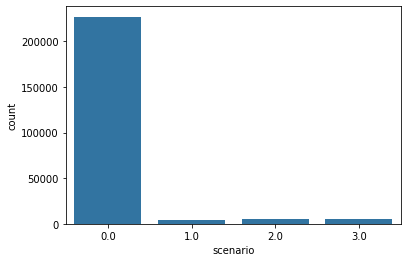

scenario
0.0    226872
3.0      5652
2.0      5328
1.0      4635
Name: count, dtype: int64


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x ='scenario', data = data_merged)
plt.show()

print(data_merged['scenario'].value_counts())

In [26]:
data_merged

,scenario,ht_min,ht_max,NORPAV,NORRR,NORRR1MM,NORPN20MM,NORPFL90,NORPXCDD,NORPINT,NORPQ90,NORPQ99,NORRR99,NORHUSAV,NORETPC,alea
0,0.0,0.0,0.0,1.88,686.66,80.00,7,80.89,48,8.29,5.21,26.28,3.96,9.18,1050.64,
0,0.0,0.0,0.0,1.88,686.66,80.00,7,80.89,48,8.29,5.21,26.28,3.96,9.18,1050.64,
0,0.0,0.0,0.0,1.88,686.66,80.00,7,80.89,48,8.29,5.21,26.28,3.96,9.18,1050.64,
1,0.0,0.0,0.0,1.89,687.14,80.02,7,80.81,48,8.27,5.21,26.30,3.96,9.18,1049.65,
1,0.0,0.0,0.0,1.89,687.14,80.02,7,80.81,48,8.27,5.21,26.30,3.96,9.18,1049.65,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80827,0.0,0.0,0.0,1.98,720.60,122.97,3,62.12,21,5.69,6.17,18.99,4.50,7.37,625.95,2
80827,0.0,0.0,0.0,1.98,720.60,122.97,3,62.12,21,5.69,6.17,18.99,4.50,7.37,625.95,2
80828,0.0,0.0,0.0,1.99,727.90,124.19,3,62.13,21,5.70,6.21,19.34,4.46,7.37,627.09,
80828,0.0,0.0,0.0,1.99,727.90,124.19,3,62.13,21,5.70,6.21,19.34,4.46,7.37,627.09,


# Tools

In [27]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle


def plot_roc_curve(y_test, y_pred):
    n_classes = len(np.unique(y_test))
    y_test = label_binarize(y_test, classes=np.arange(n_classes))

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    thresholds = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i], y_pred[:, i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(10,10))
    #plt.figure(dpi=600)
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink", linestyle=":", linewidth=4,)

    plt.plot(fpr["macro"], tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy", linestyle=":", linewidth=4,)

    colors = cycle(["aqua", "darkorange", "darkgreen", "yellow", "blue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),)

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) curve")
    plt.legend()

# MODEL

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

from sklearn.preprocessing import StandardScaler

df = data_merged.copy()

y = df["scenario"]
X = df.drop(columns=["scenario","ht_min","ht_max"])

# garder seulement numériques
X = X.select_dtypes(include=["int32","int64","float64"])


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [30]:
model = LogisticRegression(max_iter=1000, class_weight="balanced",multi_class="auto")
model.fit(X_train, y_train)


C:\Users\Lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, multi_class='auto')

              precision    recall  f1-score   support

         0.0       0.96      0.66      0.78     68062
         1.0       0.08      0.23      0.12      1391
         2.0       0.03      0.20      0.05      1598
         3.0       0.03      0.24      0.06      1696

    accuracy                           0.63     72747
   macro avg       0.28      0.33      0.25     72747
weighted avg       0.90      0.63      0.74     72747



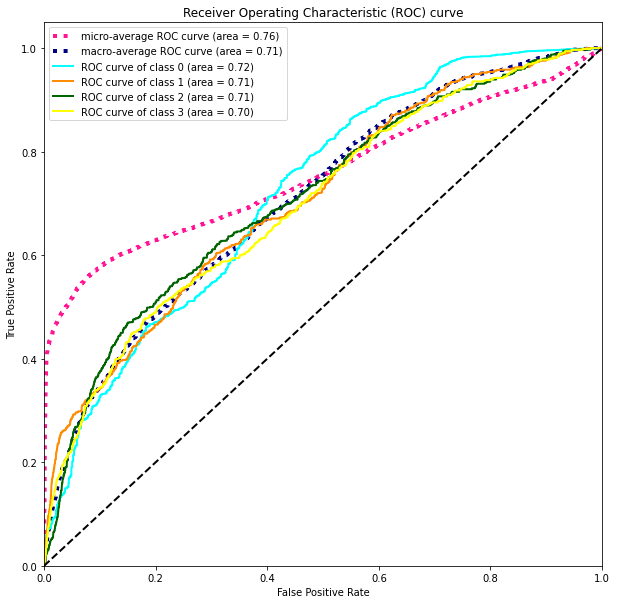

In [31]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

print(classification_report(y_test, y_pred))
plot_roc_curve(y_test, y_proba)


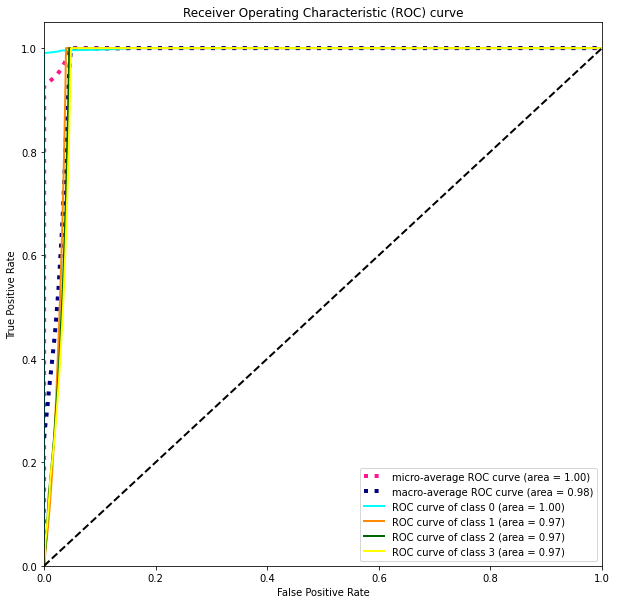

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_proba = rf.predict_proba(X_test)

plot_roc_curve(y_test, y_pred_proba)

C:\Users\Lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


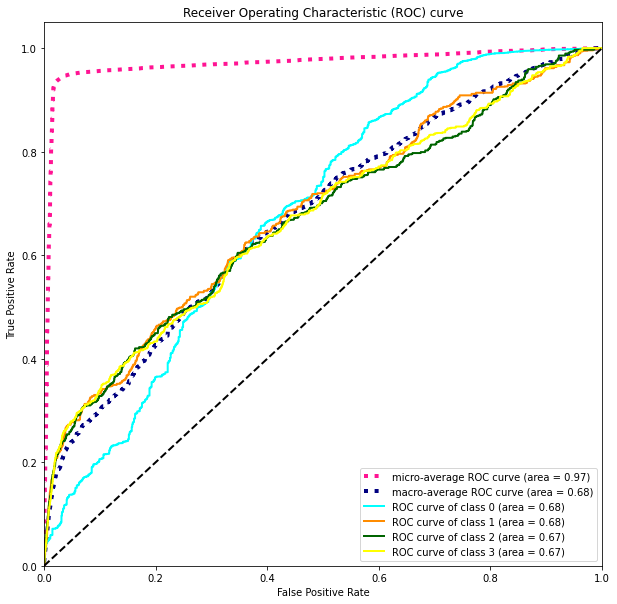

In [33]:
from sklearn.svm import SVC

svm = SVC(
    kernel="rbf",
    class_weight="balanced",
    probability=True,
    random_state=42,
    max_iter=500
)

svm.fit(X_train, y_train)

y_pred_proba_svm = svm.predict_proba(X_test)
plot_roc_curve(y_test, y_pred_proba_svm)


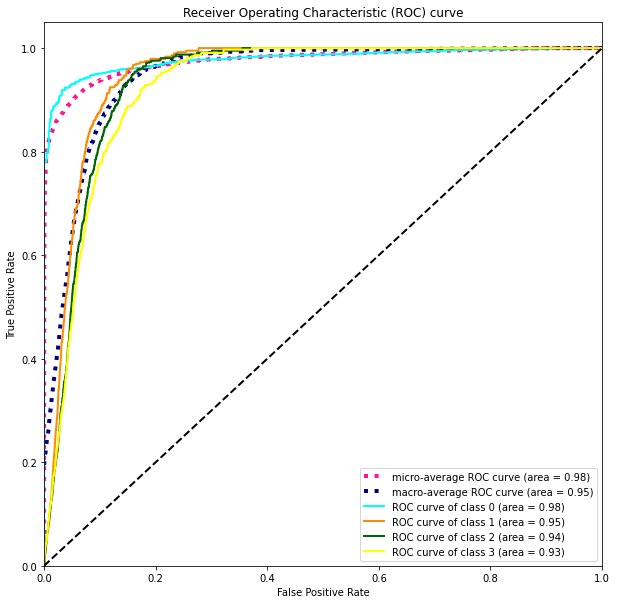

In [34]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.utils.class_weight import compute_sample_weight

sample_weights = compute_sample_weight(class_weight="balanced", y=y_train)

hgb = HistGradientBoostingClassifier(
    max_depth=6,
    learning_rate=0.05,
    random_state=42
)

hgb.fit(X_train, y_train, sample_weight=sample_weights)

y_pred_proba = hgb.predict_proba(X_test)
plot_roc_curve(y_test, y_pred_proba)
